<a href="https://colab.research.google.com/github/jainstuti/MachineLearningLabs/blob/main/students_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
#importing dataset
dataset = pd.read_csv('/content/student-mat.csv')

In [20]:
#visualising the data
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


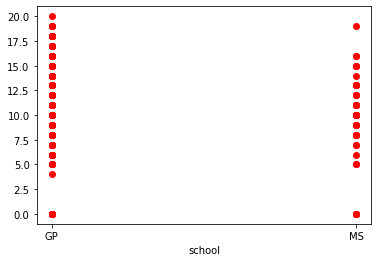

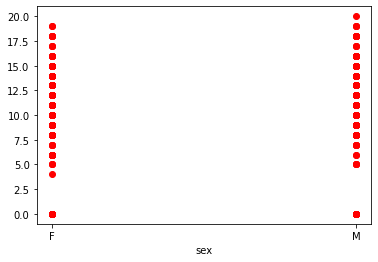

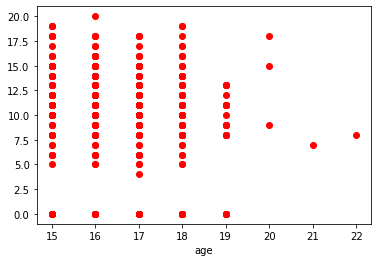

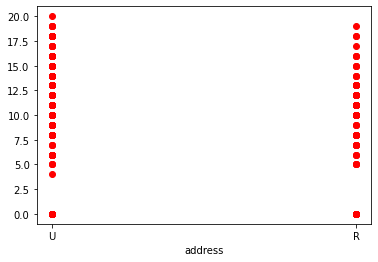

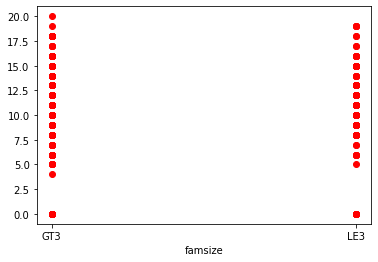

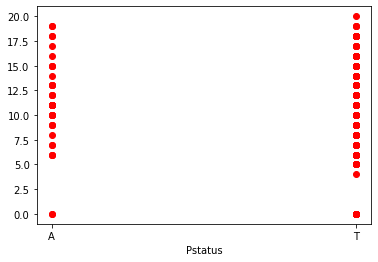

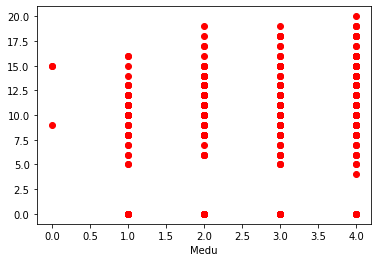

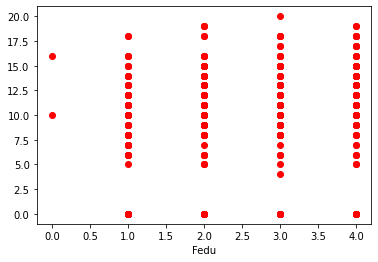

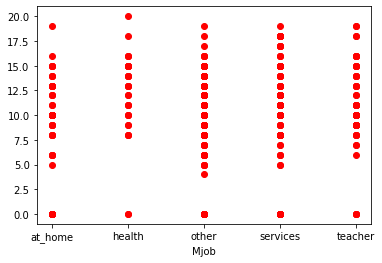

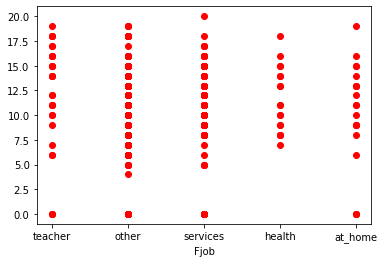

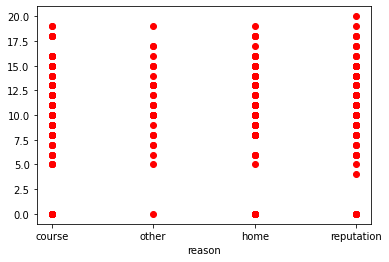

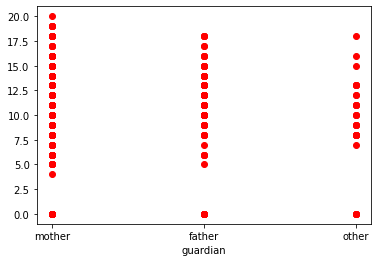

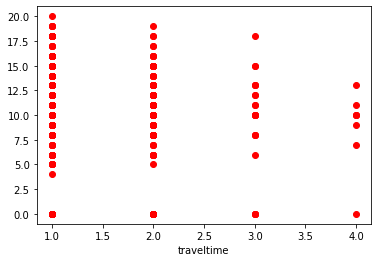

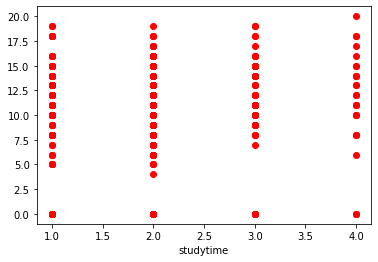

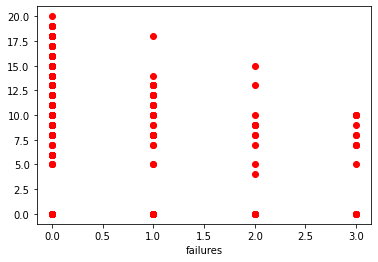

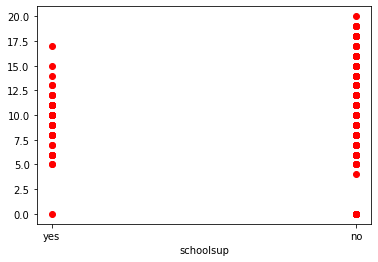

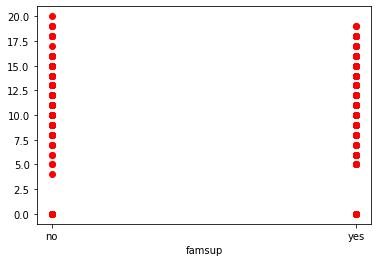

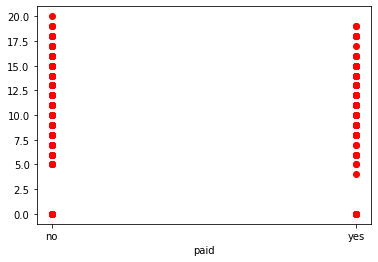

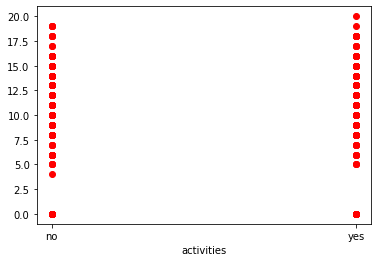

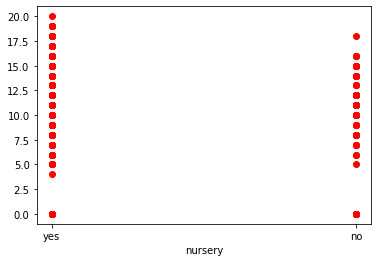

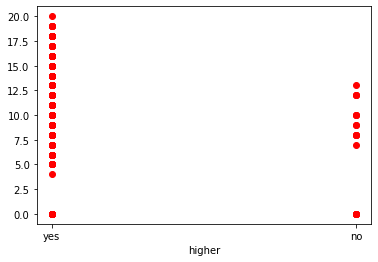

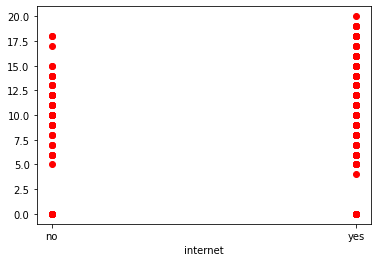

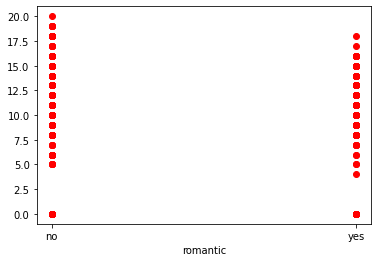

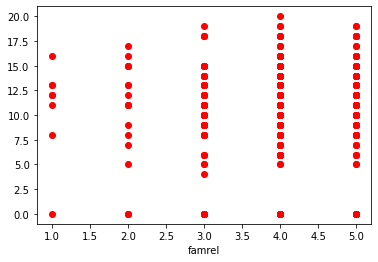

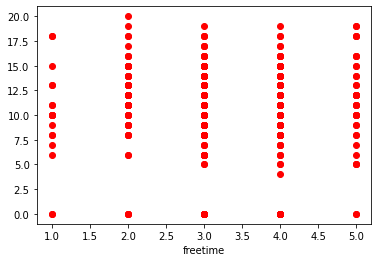

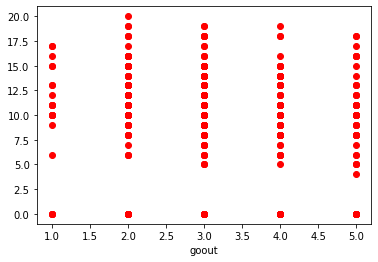

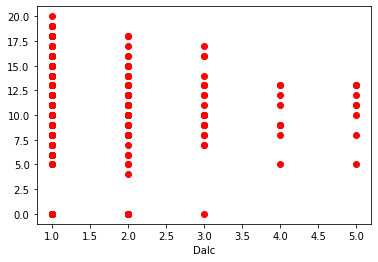

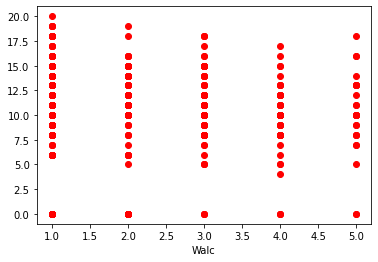

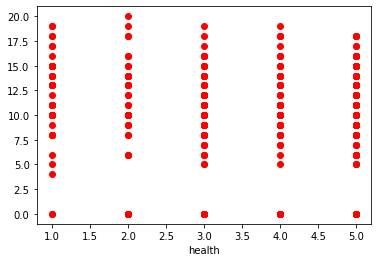

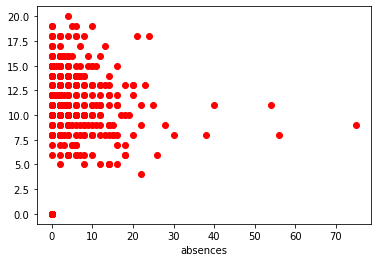

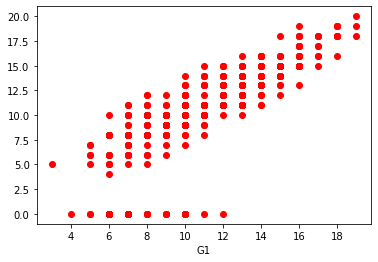

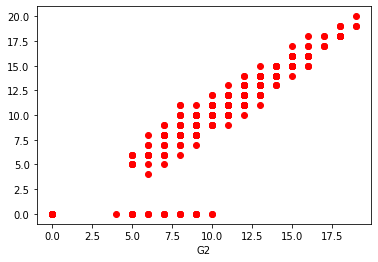

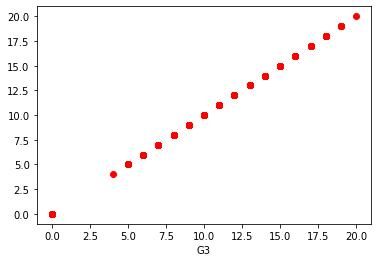

In [59]:
for i in dataset.columns:
  plt.scatter(dataset[i], dataset['G3'], color = 'red')
  # plt.plot(X_train, regressor.predict(X_train), color = 'blue')
  # plt.title('Salary vs Experience (Training set)')
  plt.xlabel(i)
  # plt.ylabel('Salary')
  plt.show()

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
dataset['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [23]:
dataset['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [24]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feece2e3b90>,
      dtype=object)

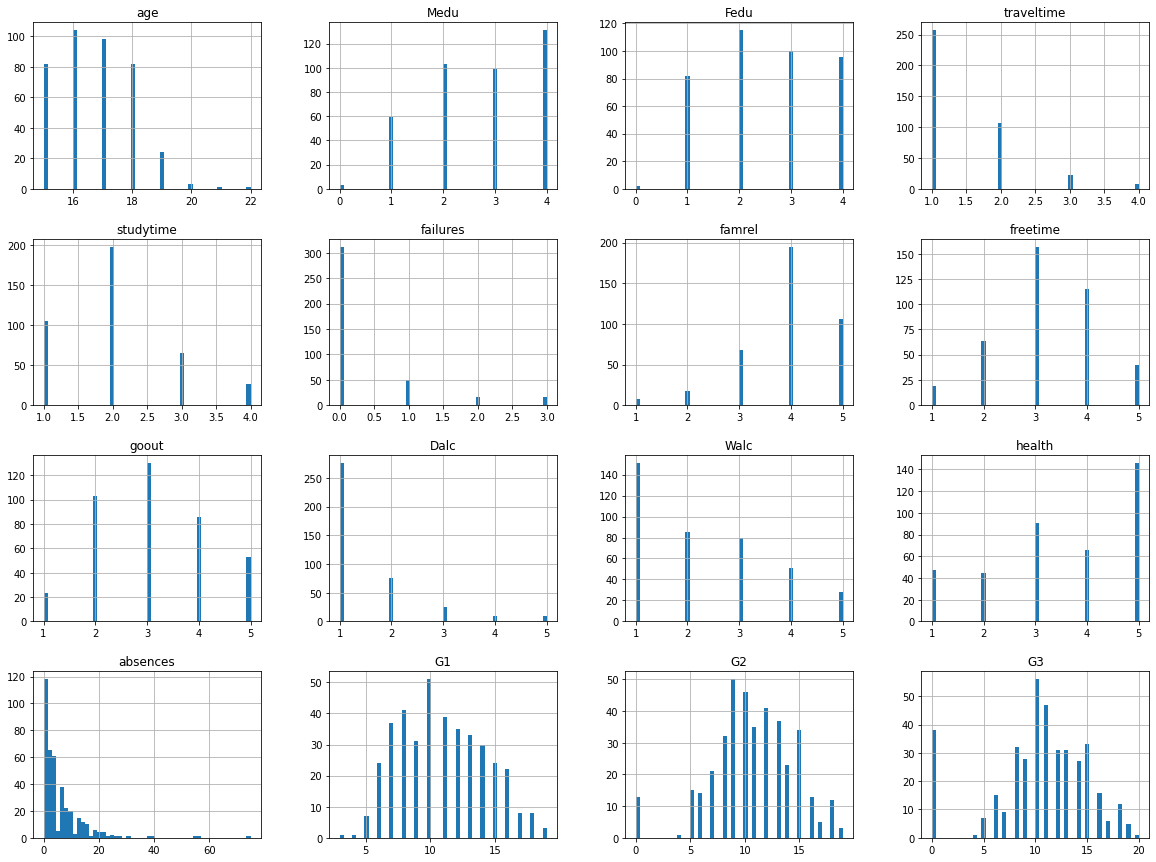

In [25]:
dataset.hist(bins=50, figsize=(20, 15))

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
print(X)

[['GP' 'F' 18 ... 6 5 6]
 ['GP' 'F' 17 ... 4 5 5]
 ['GP' 'F' 15 ... 10 7 8]
 ...
 ['MS' 'M' 21 ... 3 10 8]
 ['MS' 'M' 18 ... 0 11 12]
 ['MS' 'M' 19 ... 5 8 9]]


In [28]:
print(y)

[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 15 13 18 14 11  0  8 14 16 11 10 14 18 13 12 18  8 12 10  0 13
 11 11 13 11  0  9 10 11 13  9 11 15 15 11 16 10  9

In [29]:
#encoding the variables with more than two categories
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8, 9, 10, 11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [30]:
print(X[:2, :])

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
  'GP' 'F' 18 'U' 'GT3' 'A' 4 4 2 2 0 'yes' 'no' 'no' 'no' 'yes' 'yes'
  'no' 'no' 4 3 4 1 1 3 6 5 6]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0
  'GP' 'F' 17 'U' 'GT3' 'T' 1 1 1 2 0 'no' 'yes' 'no' 'no' 'no' 'yes'
  'yes' 'no' 5 3 3 1 1 3 4 5 5]]


In [33]:
#before - 17 
print(X[0])

[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 'GP'
 'F' 18 'U' 'GT3' 'A' 4 4 2 2 0 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no'
 4 3 4 1 1 3 6 5 6]


In [41]:
#encoding the variables with two categories
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X = le.fit_transform(X)
# 17, 18, 20, 21, 22, 28, 29, 30, 31, 32, 33, . 34, 35
categorical_col=[17, 18, 20, 21, 22, 28, 29, 30, 31, 32, 33, 34, 35]
for i in categorical_col:
  le = LabelEncoder()
  # print(X[:, i])
  # print(X[0, :])
  X[:, i] = le.fit_transform(X[:, i])
  # print(X[:, i])
  # print(X[0, :])


In [42]:
print(X[:2, :])

[[1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0 0
  18 1 0 0 4 4 2 2 0 1 0 0 0 1 1 0 0 4 3 4 1 1 3 6 5 6]
 [1 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0 0
  17 1 0 1 1 1 1 2 0 0 1 0 0 0 1 1 0 5 3 3 1 1 3 4 5 5]]


In [43]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
print(X_train)

[[0 0.0 0.0 ... 0 10 10]
 [0 0.0 1.0 ... 8 8 9]
 [1 0.0 0.0 ... 0 9 8]
 ...
 [0 0.0 1.0 ... 0 13 14]
 [0 1.0 0.0 ... 4 19 19]
 [0 0.0 0.0 ... 0 13 11]]


In [45]:
X_train[:2, :]

array([[0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 1.0, 0.0, 0.0, 0, 0, 15, 1, 1, 1, 4, 3, 1, 2, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 4, 4, 4, 2, 4, 2, 0, 10, 10],
       [0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 1.0, 0.0, 0, 0, 16, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 5, 3, 4, 1, 1, 2, 8, 8, 9]], dtype=object)

In [46]:
print(y_train)


[10 10  0 10 13 10 11 10 15 19  9  9  0  0 15  0  9 18 12 13 11 10 13  8
  8  7 12 15  0  7  0  7 10 16  6  0  8  9  0  9 16 12 13 11  0 11 16 12
 18 12 14 17  8 11 14 10  8 11 12  9 13  6 11  6  8 14 11 15 13 13 10  0
 14 11 12 11  5 11 12  5 15 13 10  8  8  8 16  6  6 10 13 11  0  8 10 14
  0 15 18 16 11 11 10 13  9  9 15 10  8 13 13 12 10 12  7 10 10 10  9  6
  8 12  8  9  9 14 18 10 10 10 11  0  0 11  5  8  5 11 12 10 11 11  8 14
 11  0 18  7 15 10  7  8  0  9 10  9 19 10 10 10 14 11 10 16 11  9 12 15
 12  8 10 15 16 11 13  6 11  5 13 10 15 14 15 11 12 11 12  8 19  0 17 13
 12 14 12 14  6 10 18 10  9 12  9 13  7 11 11 16 13 17  9 14  0 15 12 11
  6 10  0 14 10  9 13 14 12 10 16 14 16 12 14 13 10 12  0 13  8  0  8 10
 12  6 10 15 11 12 18  6 11 13 15 15  9 11  8 18 11 15 14 15 11 11 15  0
 11 11  8 10 14  0 10 17 16  9 11  0 14 11 11 11 10  6  8 17 15 10 12 16
 17  5  0  8 12  0 10  9  7 13 10 13 10 15 14 13  0  9 13 15 16 15 10 15
  8 13 20 10]


In [47]:
print(X_test)

[[0 0.0 0.0 ... 4 14 14]
 [1 0.0 0.0 ... 0 11 11]
 [0 0.0 1.0 ... 9 9 10]
 ...
 [0 0.0 0.0 ... 2 9 11]
 [0 0.0 0.0 ... 0 17 18]
 [0 1.0 0.0 ... 0 6 7]]


In [48]:
print(y_test)

[14 10  9 15 16 12 14 11  9 15 10 11 10  8 15 14 12  0 10 16  0  0  8 16
 12 15 10 19  0 14  0 10  8  4 13 10 13 18  8 11  6 18  8  8 11  0 13  0
 13  7 10 18 10  9 11  6  9 13 15 14 14 15 14 15  0 15 19 12  6  9  8 15
  5  0  9  0 11 18  0]


In [49]:
#training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#predictions
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[14.19 14.  ]
 [10.73 10.  ]
 [ 9.4   9.  ]
 [15.55 15.  ]
 [16.56 16.  ]
 [11.74 12.  ]
 [13.27 14.  ]
 [10.31 11.  ]
 [ 8.15  9.  ]
 [13.59 15.  ]
 [ 7.11 10.  ]
 [15.8  11.  ]
 [11.33 10.  ]
 [ 8.96  8.  ]
 [15.09 15.  ]
 [14.89 14.  ]
 [12.91 12.  ]
 [ 8.04  0.  ]
 [ 9.06 10.  ]
 [14.5  16.  ]
 [ 6.36  0.  ]
 [ 2.56  0.  ]
 [ 5.95  8.  ]
 [14.67 16.  ]
 [11.55 12.  ]
 [15.53 15.  ]
 [ 9.25 10.  ]
 [20.5  19.  ]
 [-0.65  0.  ]
 [13.24 14.  ]
 [-1.19  0.  ]
 [ 6.42 10.  ]
 [ 7.52  8.  ]
 [ 5.35  4.  ]
 [12.65 13.  ]
 [10.65 10.  ]
 [13.46 13.  ]
 [18.57 18.  ]
 [ 8.63  8.  ]
 [11.52 11.  ]
 [ 4.21  6.  ]
 [19.06 18.  ]
 [ 7.08  8.  ]
 [ 7.95  8.  ]
 [10.21 11.  ]
 [-3.27  0.  ]
 [11.73 13.  ]
 [ 4.95  0.  ]
 [11.67 13.  ]
 [ 6.67  7.  ]
 [ 9.1  10.  ]
 [17.88 18.  ]
 [12.87 10.  ]
 [ 7.63  9.  ]
 [12.4  11.  ]
 [ 9.14  6.  ]
 [ 9.17  9.  ]
 [11.82 13.  ]
 [15.7  15.  ]
 [13.38 14.  ]
 [13.13 14.  ]
 [13.28 15.  ]
 [13.48 14.  ]
 [16.17 15.  ]
 [ 7.48  0.  ]
 [16.38 15.  ]
 [18.54 19

In [51]:
#calculate r squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7881321321158561

In [57]:
#calculate adjusted r squared
n=len(y_test)
m=len(X_test[0])
print(n)
print(m)
adjr2=1-((1-r2)*((n-1)/(n-m-1) ))
adjr2

79
45


0.4992214031829325

In [ ]:
# student grades are not linearly related to the features of the data